In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [15]:
raw_data = pd.read_csv('data/tweets.csv', encoding='latin1')

In [16]:
raw_data.columns = ['text', 'product', 'target']

In [17]:
target_values = {'No emotion toward brand or product':1, 'Positive emotion':2, 'Negative emotion':0, "I can't tell":1}

raw_data['target'] = raw_data['target'].map(target_values)

In [18]:
raw_data = raw_data.dropna(subset=['text']).drop_duplicates(subset=['text']).reset_index(drop=True)

In [65]:
new = pd.read_csv('data/tweets.csv', encoding='latin1')
new.columns = ['text', 'product', 'target']
target_values = {'No emotion toward brand or product':1, 'Positive emotion':2, 'Negative emotion':0, "I can't tell":1}

new['target'] = new['target'].map(target_values)
new = new.dropna(subset=['text']).drop_duplicates(subset=['text']).reset_index(drop=True)

In [83]:
a = new.loc[0, 'text']
a

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [84]:
a = a.lower()

In [19]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [81]:
a = remove_pattern(a, '@[\w]*')

In [82]:
a

'. i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead!  i need to upgrade. plugin stations at #sxsw.'

In [79]:
a.replace('[^a-zA-Z#]', ' ')

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [20]:
raw_data['clean'] = np.vectorize(remove_pattern)(raw_data['text'], '@[\w]*')

In [21]:
raw_data['clean'] = raw_data['clean'].str.replace('[^a-zA-Z#]', ' ')

In [22]:
raw_data['clean'] = raw_data['clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [23]:
def preprocess(text):
    return text.apply(lambda x: re.sub(r'([^A-Za-z0-9|\s|[:punct:]]*)', '', x))

In [88]:
a = re.sub(r'([^A-Za-z0-9|\s|[:punct:]]*)', '', a)

In [24]:
raw_data['clean'] = preprocess(raw_data['clean'])

In [25]:
tokenize_data = raw_data['clean'].apply(lambda x: x.split())
tokenize_data.head()

0    [have, iPhone, After, tweeting, RISE, Austin, ...
1    [Know, about, Awesome, iPad, iPhone, that, lik...
2    [wait, iPad, also, They, should, sale, them, d...
3    [hope, this, year, festival, crashy, this, yea...
4    [great, stuff, SXSW, Marissa, Mayer, Google, R...
Name: clean, dtype: object

In [92]:
a = a.split()

In [93]:
['wesley83', 'i', 'have', 'a', '3g', 'iphone', 'after', '3', 'hrs', 'tweeting', 'at', 'riseaustin', 'it', 'was', 'dead', 'i', 'need', 'to', 'upgrade', 'plugin', 'stations', 'at', 'sxsw']

['wesley83',
 'i',
 'have',
 'a',
 '3g',
 'iphone',
 'after',
 '3',
 'hrs',
 'tweeting',
 'at',
 'riseaustin',
 'it',
 'was',
 'dead',
 'i',
 'need',
 'to',
 'upgrade',
 'plugin',
 'stations',
 'at',
 'sxsw']

In [26]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
# 
def cleaning(text):
    return [word for word in text if word not in stopwords]

In [96]:
['wesley83', '3g', 'iphone', '3', 'hrs', 'tweeting', 'riseaustin', 'dead', 'need', 'upgrade', 'plugin', 'stations', 'sxsw']

['wesley83',
 '3g',
 'iphone',
 '3',
 'hrs',
 'tweeting',
 'riseaustin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'stations',
 'sxsw']

In [27]:
tokenize_data = tokenize_data.apply(cleaning)

In [28]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = nltk.stem.WordNetLemmatizer()

tokenize_data = tokenize_data.apply(lambda x: [lemmatizer.lemmatize(i.lower()) for i in x])
tokenize_data.head()

0    [iphone, after, tweeting, rise, austin, dead, ...
1    [know, awesome, ipad, iphone, likely, apprecia...
2                 [wait, ipad, also, they, sale, sxsw]
3    [hope, year, festival, crashy, year, iphone, s...
4    [great, stuff, sxsw, marissa, mayer, google, r...
Name: clean, dtype: object

In [94]:
tokenize_data[0]

'iphone after tweeting rise austin dead need upgrade plugin station sxsw'

In [29]:
for i in range(len(tokenize_data)):
    tokenize_data[i] = ' '.join(tokenize_data[i])

raw_data['clean'] = tokenize_data

In [37]:
raw_data.dropna(subset=['clean']).to_csv('data/all_words.csv', index=False)

In [38]:
data = pd.read_csv('data/all_words.csv')

In [43]:
data.dropna(subset=['clean'], inplace=True)

In [44]:
data.isnull().sum()

text          0
product    5784
target        0
clean         0
dtype: int64

In [39]:
data.head()

,text,product,target,clean
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,iphone after tweeting rise austin dead need up...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,2,know awesome ipad iphone likely appreciate des...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,2,wait ipad also they sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,hope year festival crashy year iphone sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,2,great stuff sxsw marissa mayer google reilly t...


In [45]:
def build_corpus(data):
    corpus = []
    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(data['clean'])

In [ ]:
# from gensim.models import Word2Vec
# from nltk import word_tokenize

# X_train_token = X_train.map(word_tokenize)
# model = Word2Vec(X_train_token, window=5, min_count=1, workers=4)

In [46]:
from gensim.models import Word2Vec
model = Word2Vec(corpus, size=100, min_count=1)

In [47]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
vectors = model[model.wv.vocab]
words = list(model.wv.vocab)
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(vectors)

In [48]:
words = pd.DataFrame(words)
PCA_result = pd.DataFrame(PCA_result)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]
PCA_data_complet.to_csv('data/PCA_data_complet.csv',index=False)

In [49]:
# word frequencies calculation
from collections import Counter
# count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter_all = counter_word(data['clean'])
words_all = counter_all.most_common(100)

words_all= pd.DataFrame(words_all)
words_all['word'] = words_all.iloc[0:, 0]
words_all['count'] = words_all.iloc[0:, 1]
words_all = words_all[['word','count']]
words_all.to_csv('data/top100_words.csv', columns=['word','count'], index=False)

In [50]:
# restriction to 100 most frequent words
top100_words = pd.read_csv('data/top100_words.csv')
PCA_data_top_100 = PCA_data_complet.merge(top100_words, how='inner', left_on='word',right_on='word')
PCA_data_top_100.to_csv('data/PCA_data_top_100.csv', index=False)

In [51]:
words_1k = counter_all.most_common(1000)

words_1k= pd.DataFrame(words_1k)
words_1k['word'] = words_1k.iloc[0:, 0]
words_1k['count'] = words_1k.iloc[0:, 1]
words_1k = words_1k[['word','count']]
words_1k.to_csv('data/top1000_words.csv', columns=['word','count'], index=False)

# restriction to 100 most frequent words
top1000_words = pd.read_csv('data/top1000_words.csv')
PCA_data_top_1000 = PCA_data_complet.merge(top1000_words, how='inner', left_on='word',right_on='word')
PCA_data_top_1000.to_csv('data/PCA_data_top_1000.csv', index=False)

In [52]:
negative = data.loc[data['target']==0]

In [53]:
corpus = build_corpus(data['clean'])

In [54]:
from gensim.models import Word2Vec
n_model = Word2Vec(corpus, size=100, min_count=1)

In [57]:
n_vectors = n_model[n_model.wv.vocab]
n_words = list(n_model.wv.vocab)
n_pca = PCA(n_components=2)
n_PCA_result = n_pca.fit_transform(vectors)

In [63]:
n_words = pd.DataFrame(n_words)
n_PCA_result = pd.DataFrame(n_PCA_result)
n_PCA_result['x_values'] =n_PCA_result.iloc[0:, 0]
n_PCA_result['y_values'] =n_PCA_result.iloc[0:, 1]
n_PCA_final = pd.merge(n_words, n_PCA_result, left_index=True, right_index=True)
n_PCA_final['word'] =n_PCA_final.iloc[0:, 0]
n_PCA_data_complet =n_PCA_final[['word','x_values','y_values']]
n_PCA_data_complet.to_csv('data/PCA_data_complet_n.csv',index=False)

In [64]:
n_words_1k = counter_all.most_common(1000)

n_words_1k= pd.DataFrame(n_words_1k)
n_words_1k['word'] = n_words_1k.iloc[0:, 0]
n_words_1k['count'] = n_words_1k.iloc[0:, 1]
n_words_1k = words_1k[['word','count']]
n_words_1k.to_csv('data/top1000_words_negative.csv', columns=['word','count'], index=False)

# restriction to 100 most frequent words
top1000_words_n = pd.read_csv('data/top1000_words_negative.csv')
PCA_data_top_1000_n = n_PCA_data_complet.merge(top1000_words_n, how='inner', left_on='word',right_on='word')
PCA_data_top_1000_n.to_csv('data/PCA_data_top_1000_negative.csv', index=False)

In [37]:
import seaborn as sns

sns.set_style('ticks')

In [169]:
def process_data(file):
    df = pd.read_csv(file).drop([0,1]).reset_index(drop=True)
    num_cols = ['x_values', 'y_values', 'count', 'Silhouette']
    df[num_cols] = df.loc[:, num_cols].astype('float64')
    return df
    
def plot_cluster(df):
    fig = sns.lmplot(x='x_values', y='y_values', data=df, fit_reg=False, legend=True, hue='Cluster', palette='Paired')
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    plt.show()

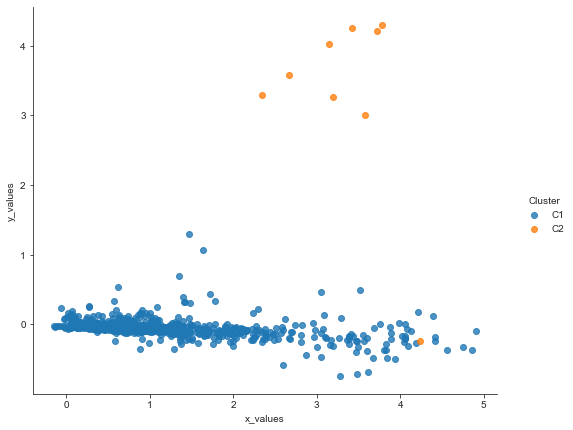

In [54]:
cluster2_data = process_data('data/cluster2_top1000.csv')
plot_cluster(cluster2_data)

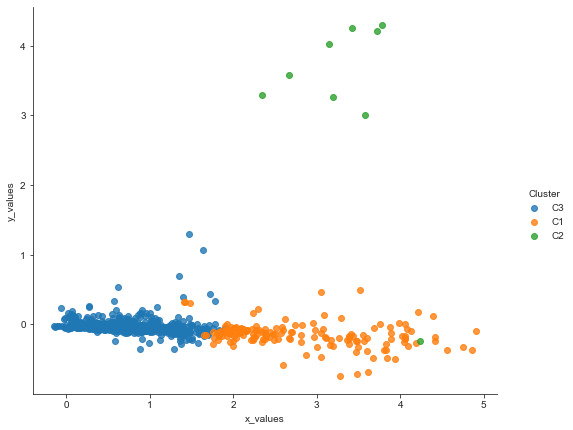

In [55]:
cluster3_data = process_data('data/cluster3_top1000.csv')
plot_cluster(cluster3_data)

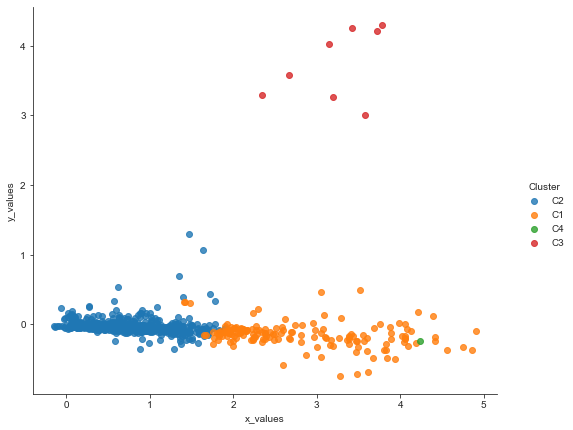

In [53]:
cluster4_data = process_data('data/cluster_top1000.csv')
plot_cluster(cluster4_data)

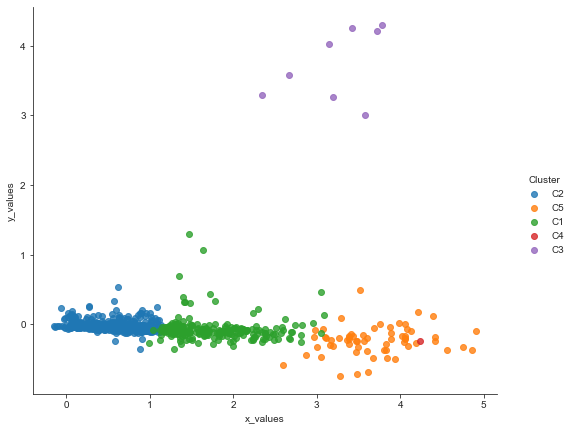

In [56]:
cluster5_data = process_data('data/cluster5_top1000.csv')
plot_cluster(cluster5_data)

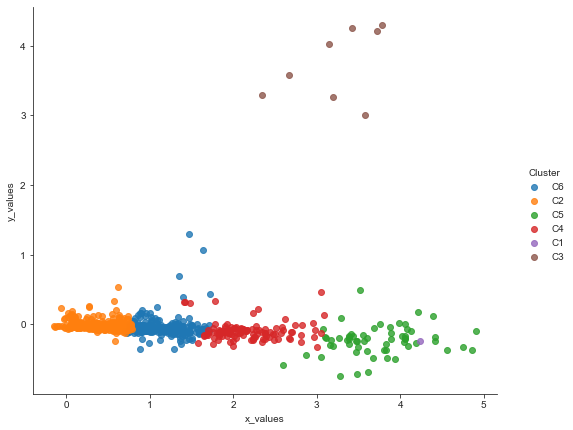

In [58]:
cluster6_data = process_data('data/cluster6_top1000.csv')
plot_cluster(cluster6_data)

In [83]:
cluster6_data.groupby('Cluster').agg(['count', 'mean'])['Silhouette']

,count,mean
Cluster,,
C1,1,0.500000
C2,544,0.671562
C3,8,0.694157
C4,112,0.621268
C5,60,0.598980
C6,275,0.598727


In [88]:
cluster6_data.sort_values('count', ascending=False)[:20]

,x_values,y_values,count,word,Cluster,Silhouette
71,4.232746,-0.236558,1528.0,store,C1,0.500000
122,3.200685,3.263005,683.0,launch,C3,0.688537
124,3.783673,4.306313,663.0,social,C3,0.702629
36,4.860034,-0.365946,598.0,android,C5,0.577045
127,3.717602,4.206253,587.0,circle,C3,0.709477
129,3.582466,3.000314,577.0,today,C3,0.684160
125,3.420786,4.252448,467.0,network,C3,0.710541
131,3.671145,-0.488340,448.0,line,C5,0.593595
55,4.751184,-0.324246,401.0,party,C5,0.613791
12,4.564972,-0.364521,388.0,free,C5,0.616656


In [90]:
cluster_dict = {}
for i in range(1,7):
    cluster_dict[f'Cluster {i}'] = cluster6_data.loc[cluster6_data['Cluster']==f'C{i}']

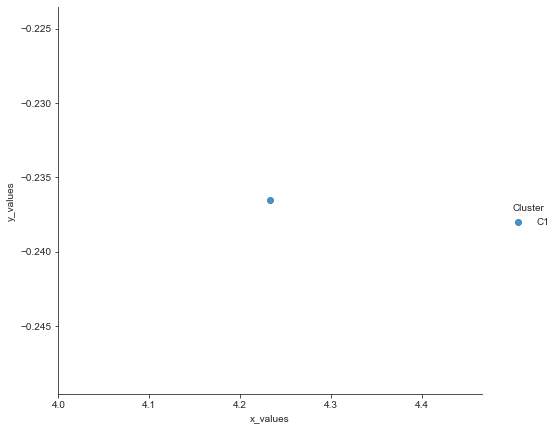

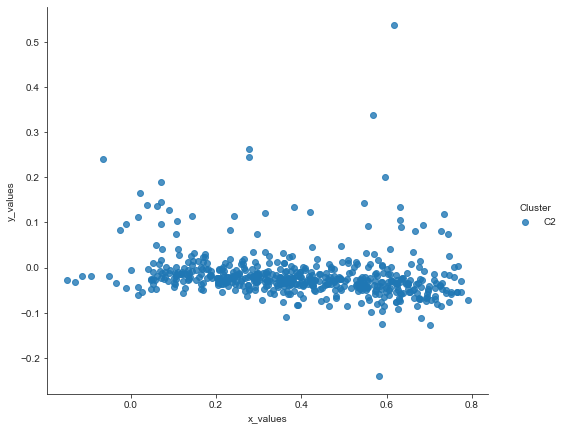

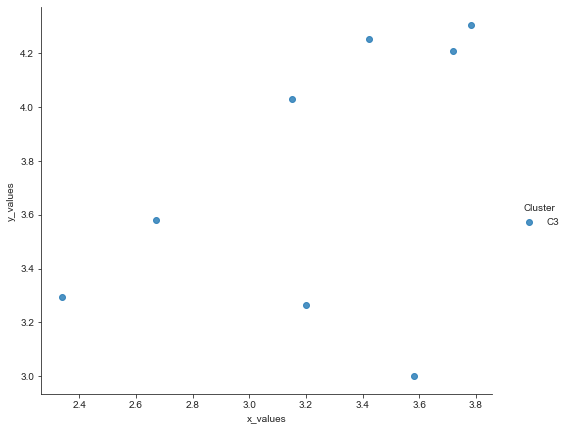

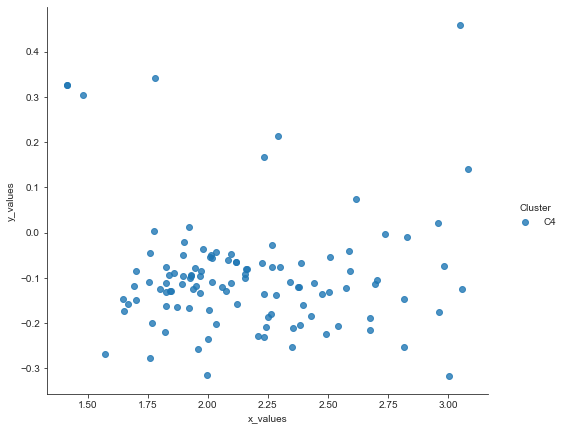

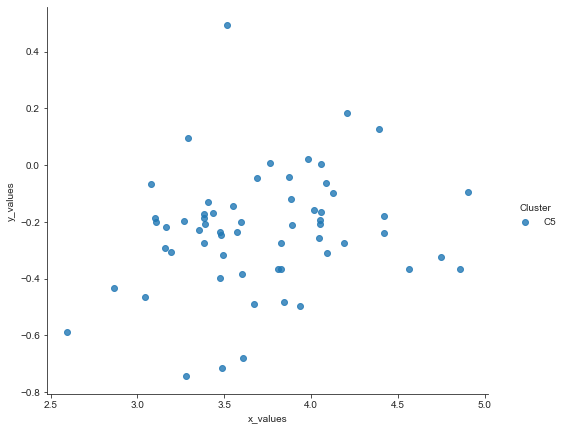

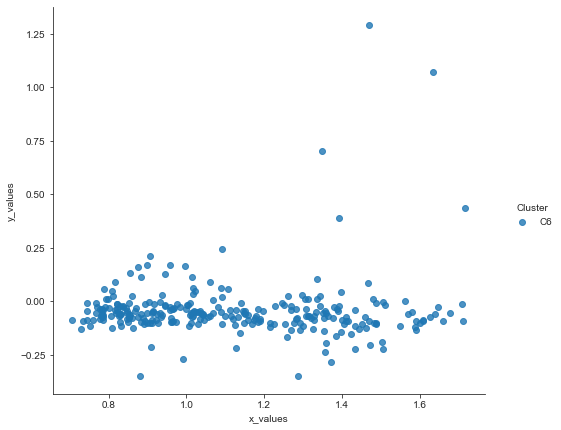

In [91]:
for i in range(1,7):
    plot_cluster(cluster_dict[f'Cluster {i}'])

In [210]:
from wordcloud import WordCloud

def create_wordcloud(name, cluster, background_color='#f7f7f7', colormap='viridis'):
    wordcloud = WordCloud(min_font_size=20, prefer_horizontal=1, max_words=20, background_color=background_color, width=800, height=400, colormap=colormap, random_state=1).generate_from_frequencies(dict(cluster))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.title(f'{name} Word Cloud')
    plt.axis('off')
    plt.show()

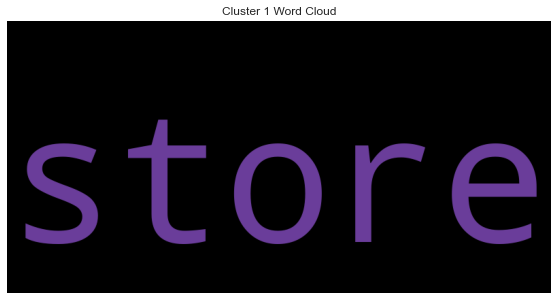

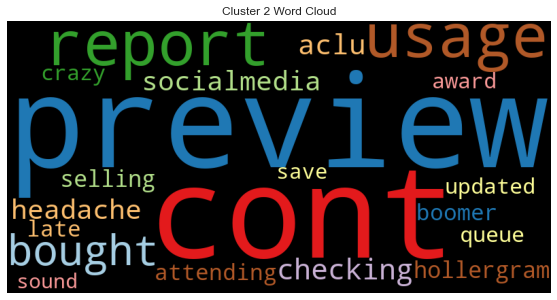

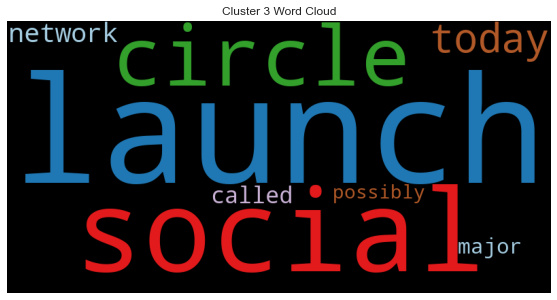

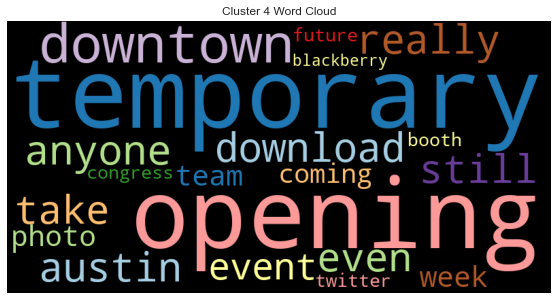

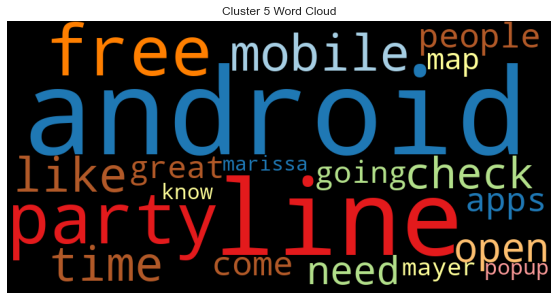

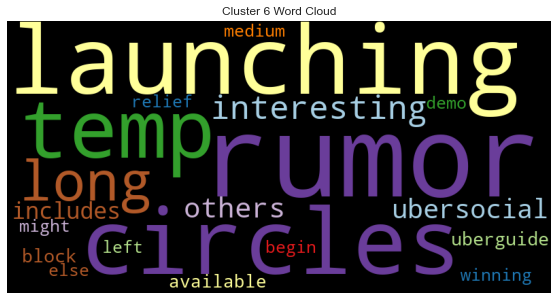

In [123]:
for key, val in cluster_dict.items():
    word_count = val[['word', 'count']].sort_values('count', ascending=False).reset_index(drop=True)
    cluster_freq = []
    for i in range(len(word_count)):
        cluster_freq.append((word_count.loc[i, 'word'], word_count.loc[i, 'count']))
    create_wordcloud(key, cluster_freq, background_color='black')

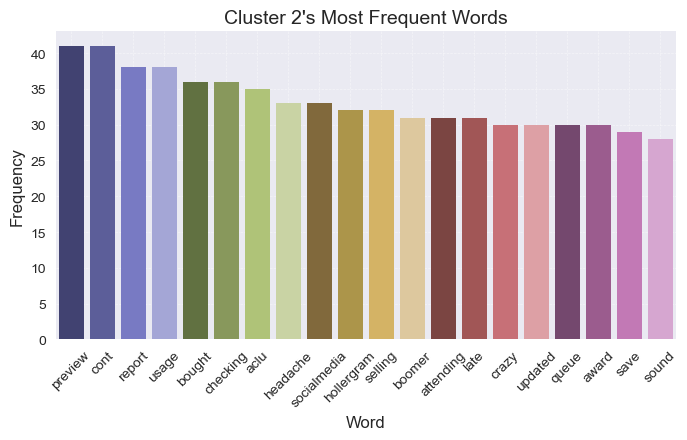

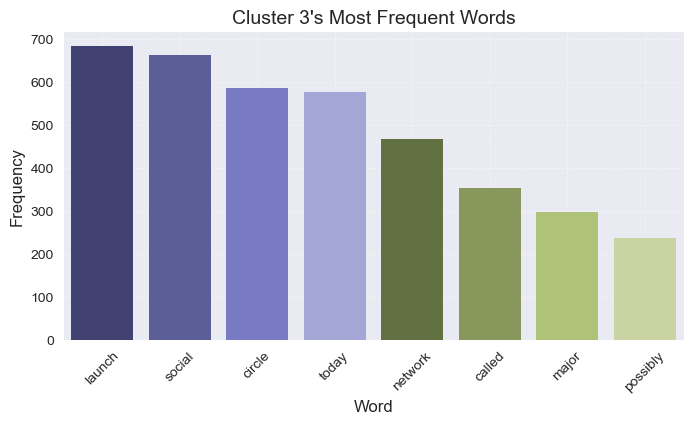

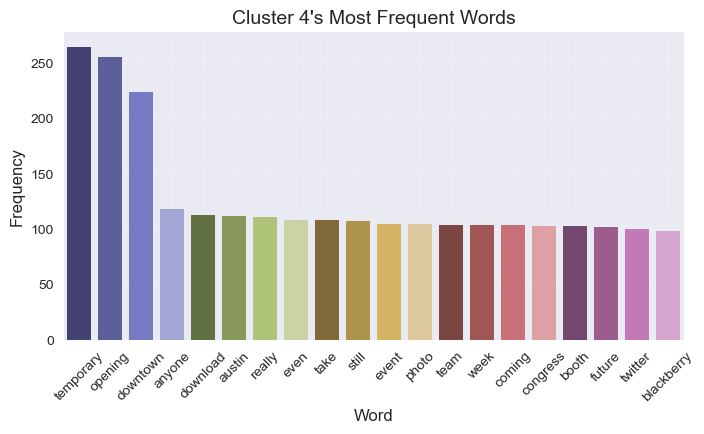

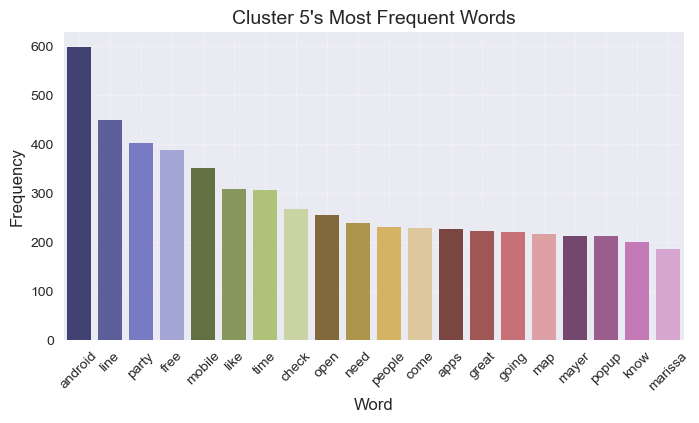

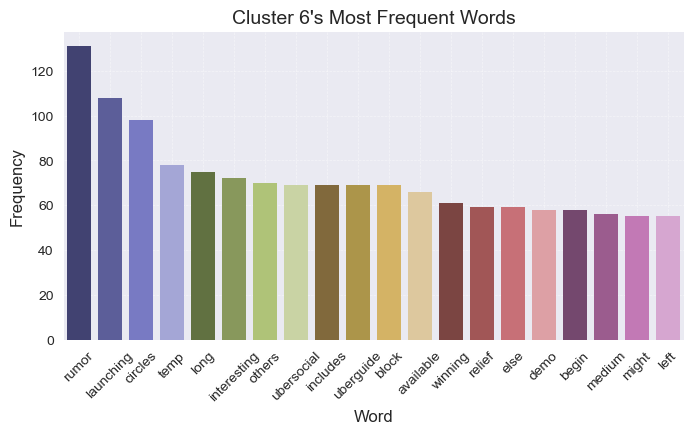

In [149]:
for key, val in cluster_dict.items():
    if key == 'Cluster 1':
        continue
    word_count = val[['word', 'count']].sort_values('count', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax = sns.barplot(x='word', y='count', data=word_count.head(20), palette='tab20b', zorder=3)
    ax.set_title(f"{key}'s Most Frequent Words", fontsize=14)
    ax.set_xlabel('Word', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(linestyle = '--', linewidth = 0.5, alpha=.5, zorder=0)

In [159]:
words_2k = pd.DataFrame(counter_all.most_common(2000))

words_2k['word'] = words_2k.iloc[0:, 0]
words_2k['count'] = words_2k.iloc[0:, 1]
words_2k = words_2k[['word','count']]
words_2k.to_csv('top2000_words.csv', columns=['word','count'], index=False)

# restriction to 100 most frequent words
top2000_words = pd.read_csv('top2000_words.csv')
PCA_data_top_2000 = PCA_data_complet.merge(top2000_words, how='inner', left_on='word',right_on='word')
PCA_data_top_2000.to_csv('PCA_data_top_2000.csv', index=False)

In [162]:
cluster2 = process_data('data/cluster2000/cluster2_2000.csv')
cluster3 = process_data('data/cluster2000/cluster3_2000.csv')
cluster4 = process_data('data/cluster2000/cluster4_2000.csv')
cluster5 = process_data('data/cluster2000/cluster5_2000.csv')
cluster6 = process_data('data/cluster2000/cluster6_2000.csv')
cluster7 = process_data('data/cluster2000/cluster7_2000.csv')
cluster8 = process_data('data/cluster2000/cluster8_2000.csv')
cluster9 = process_data('data/cluster2000/cluster9_2000.csv')
cluster10 = process_data('data/cluster2000/cluster10_2000.csv')

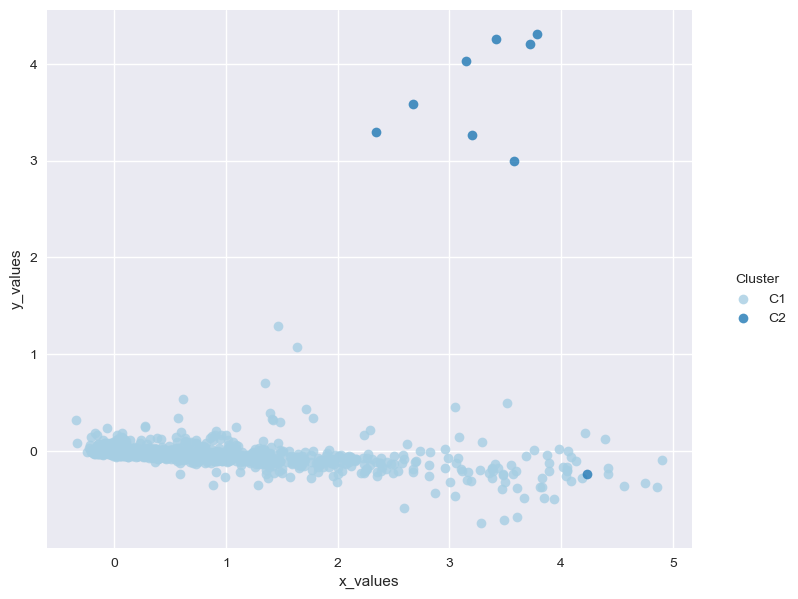

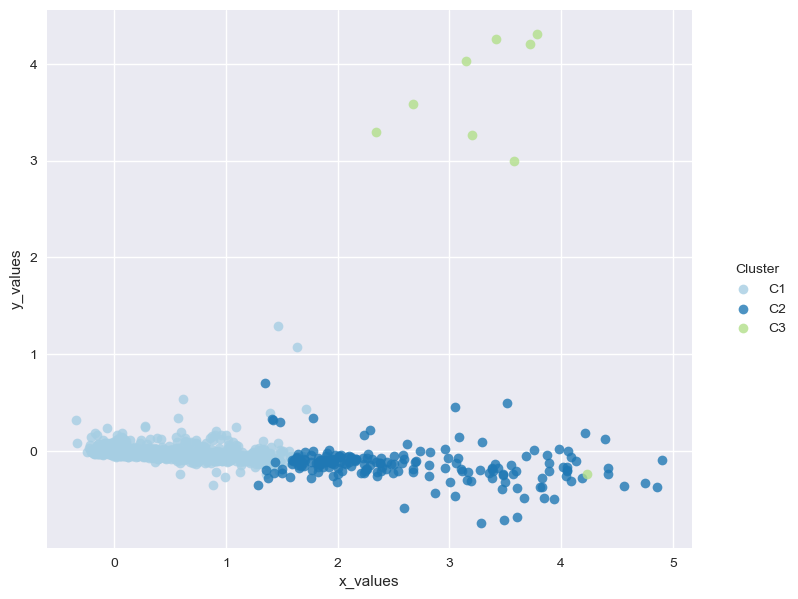

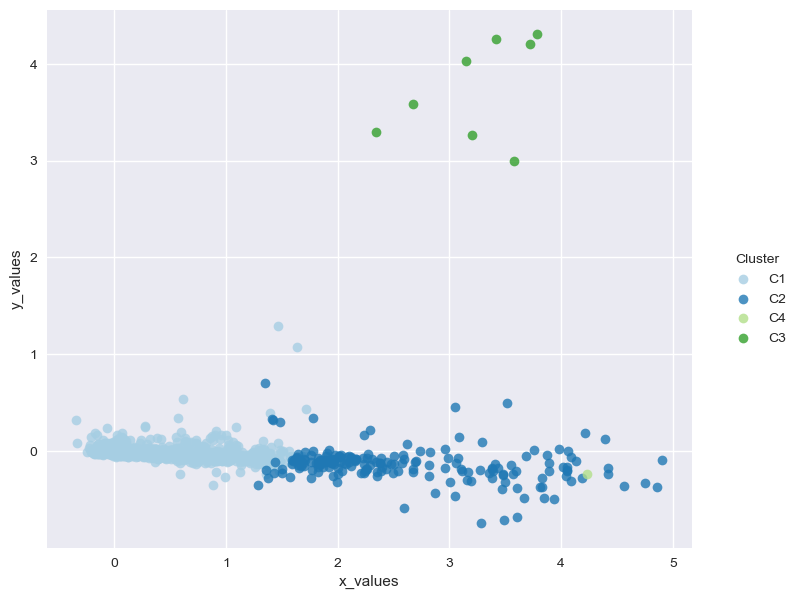

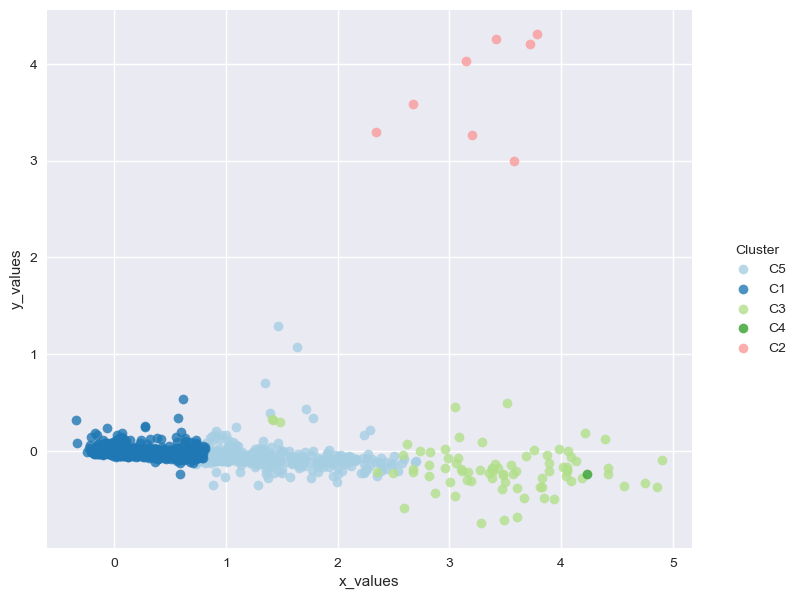

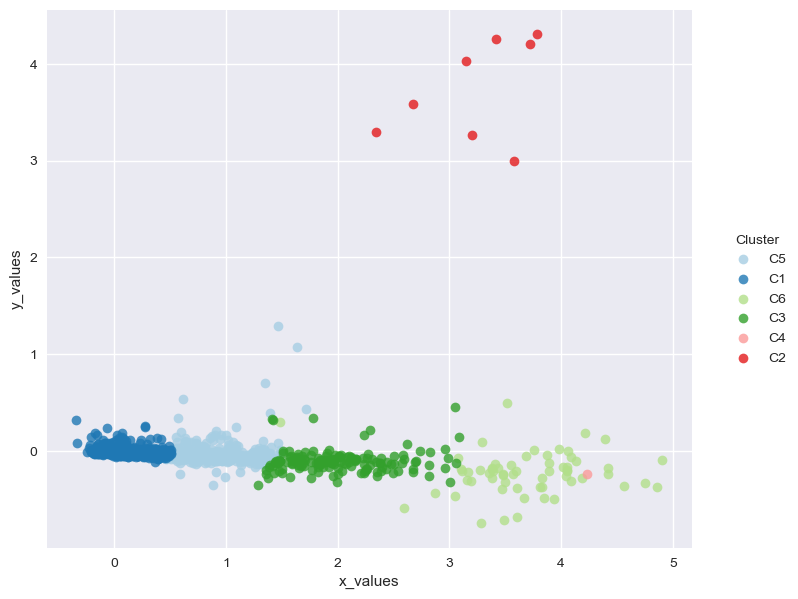

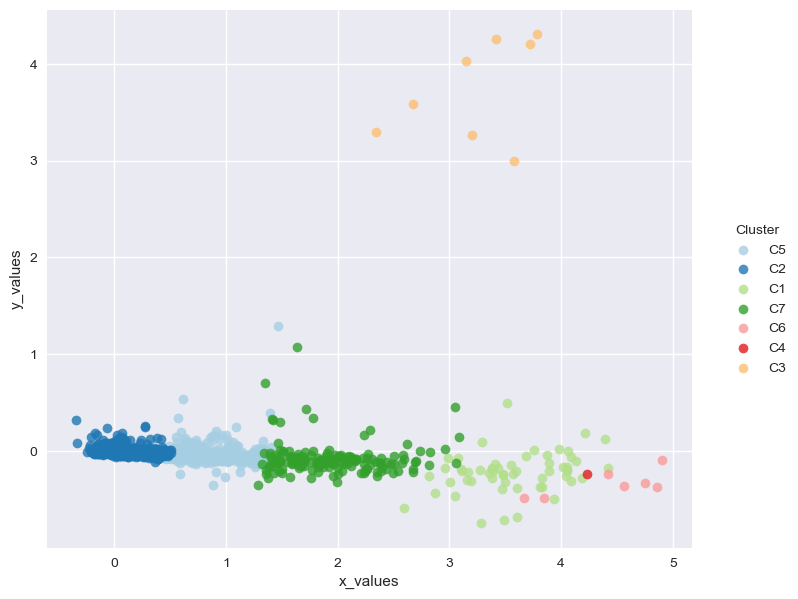

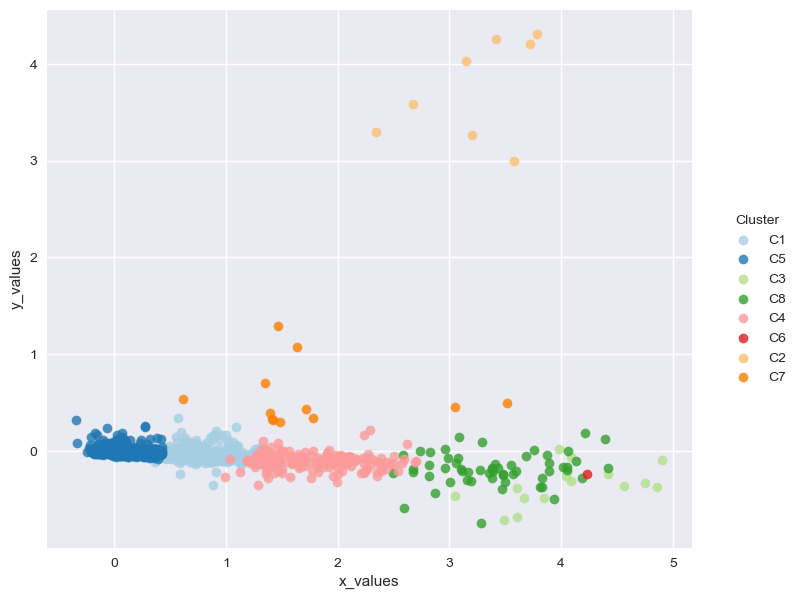

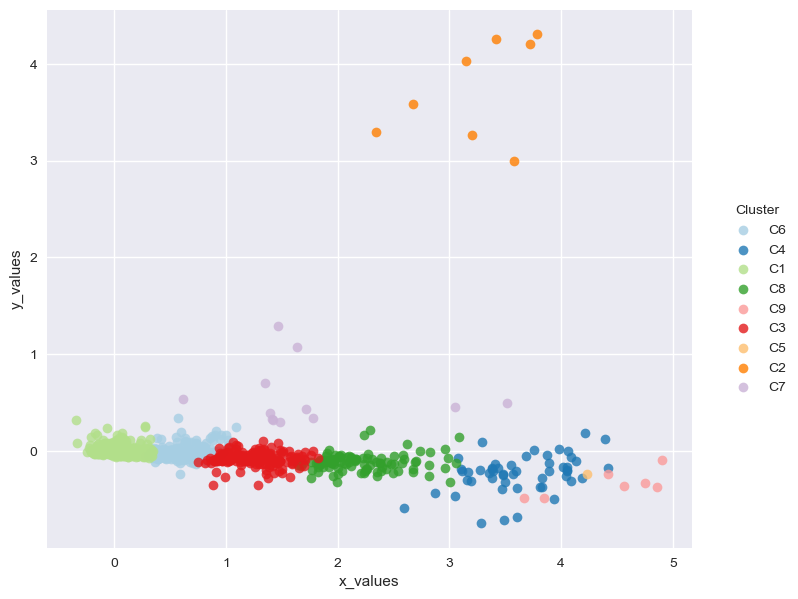

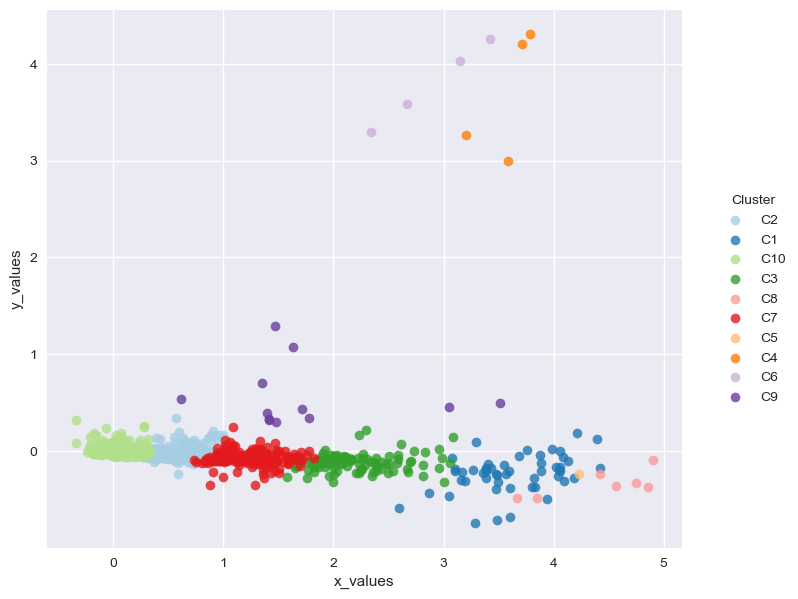

In [170]:
cluster_list = [cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8, cluster9, cluster10]

for cluster in cluster_list:
    plot_cluster(cluster)

In [171]:
X_processed = PCA(n_components=2).fit_transform(data['clean'])
X_processed3d = PCA(n_components=3).fit_transform(X)

NameError: name 'X' is not defined

In [172]:
pca = PCA(n_components=3)
PCA3_result = pca.fit_transform(vectors)
PCA3_result = pd.DataFrame(PCA3_result)

In [ ]:


PCA3_result['x_values'] =PCA_result.iloc[0:, 0]
PCA3_result['y_values'] =PCA_result.iloc[0:, 1]
PCA3_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]

words_2k = pd.DataFrame(counter_all.most_common(2000))

words_2k['word'] = words_2k.iloc[0:, 0]
words_2k['count'] = words_2k.iloc[0:, 1]
words_2k = words_2k[['word','count']]
words_2k.to_csv('top2000_words.csv', columns=['word','count'], index=False)

# restriction to 100 most frequent words
top2000_words = pd.read_csv('top2000_words.csv')
PCA_data_top_2000 = PCA_data_complet.merge(top2000_words, how='inner', left_on='word',right_on='word')
PCA_data_top_2000.to_csv('PCA_data_top_2000.csv', index=False)

In [193]:
X_processed = np.array(PCA_result)
X_processed3d = np.array(PCA3_result)

In [189]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [194]:
cluster = AgglomerativeClustering()
cluster.fit(X_processed)
silhouette_score(X_processed, cluster.labels_)

0.87314045

In [191]:
def test_n_for_clustering(n, data):
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score, silhouette_samples
    # Fit the new clustering model
    cluster = AgglomerativeClustering(n_clusters=n)
    cluster.fit(data)
    # Print the silhouette score
    print(silhouette_score(data,cluster.labels_))
    # Return the labels attribute from the fit clustering model
    return cluster.labels_

0.87314045


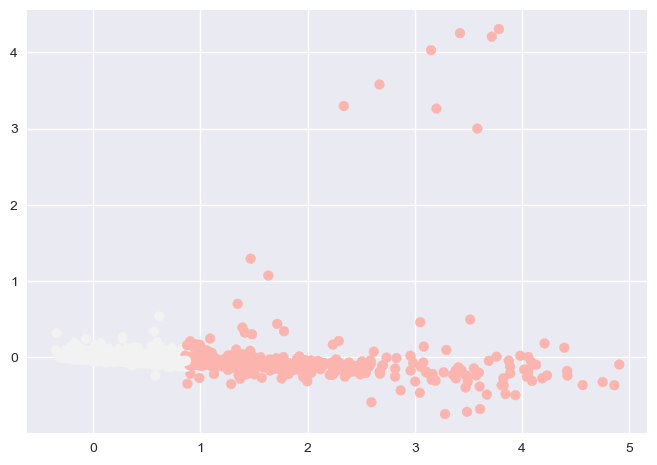

0.84996295


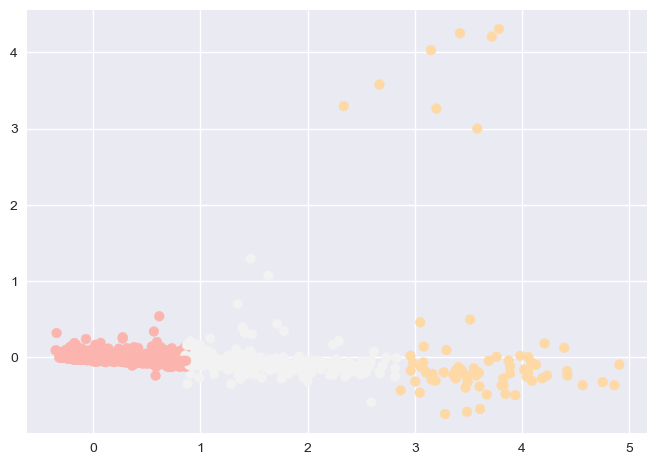

0.76040757


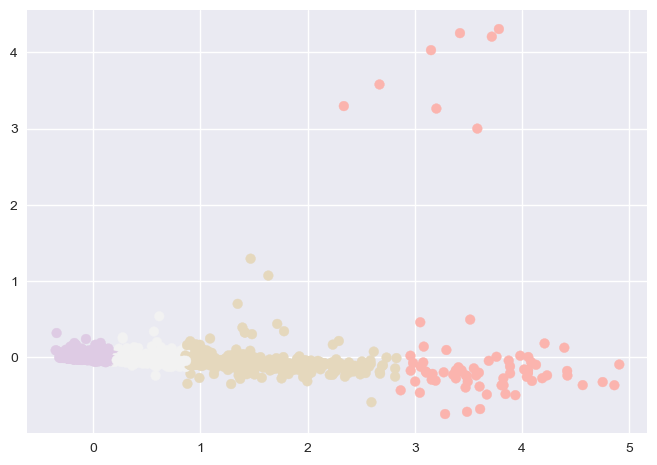

0.7617311


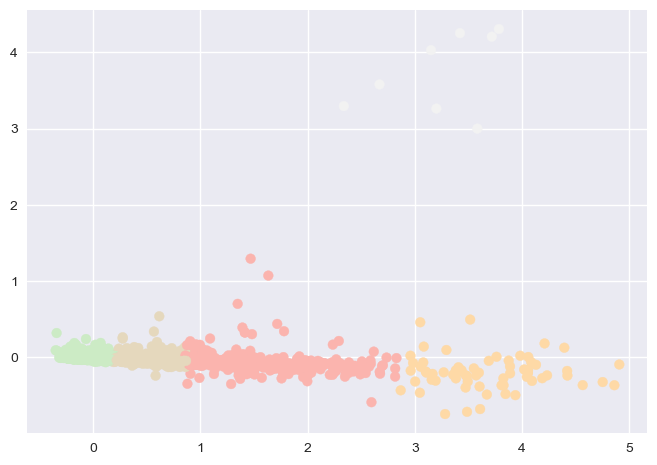

0.76252294


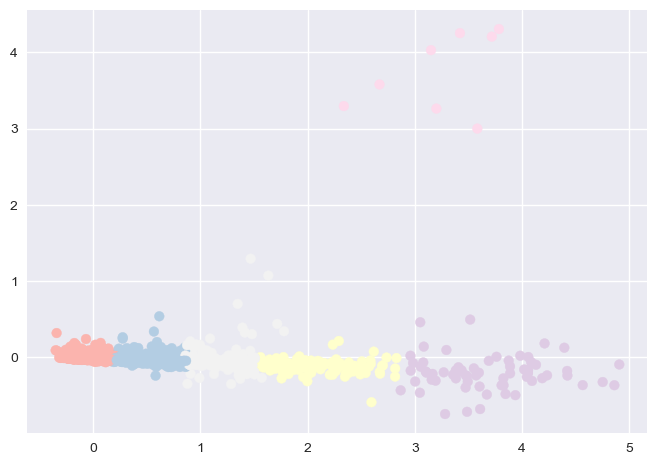

0.6317236


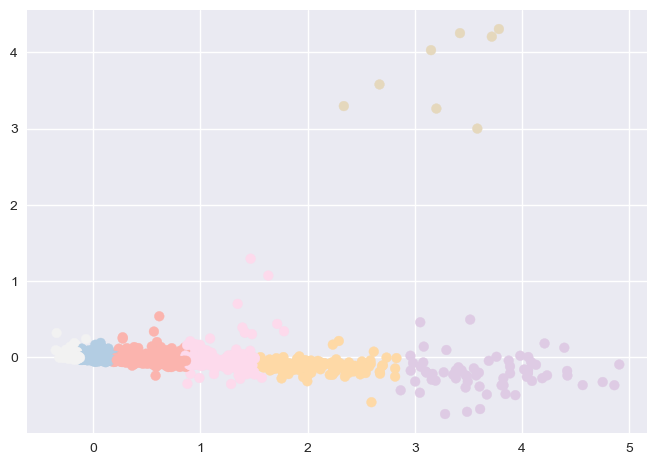

0.6290384


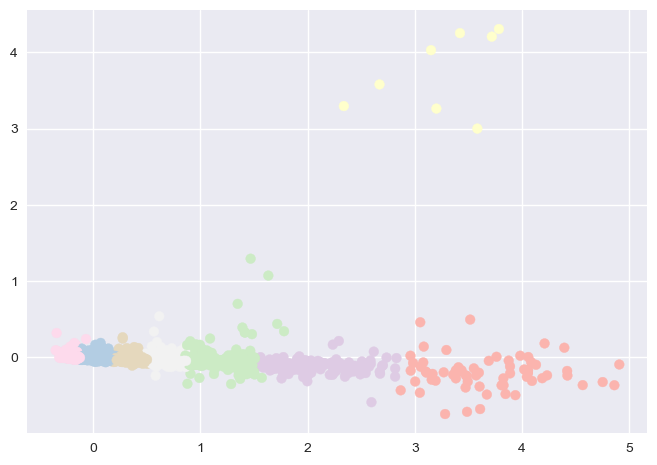

In [212]:
for n in range(2, 9):
    plt.scatter(x=X_processed[:,0], y=X_processed[:,1],c=test_n_for_clustering(n, X_processed), cmap='Pastel1')
    plt.show()

0.8558472


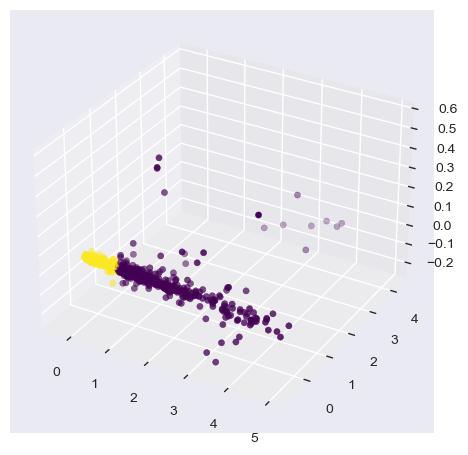

0.83906347


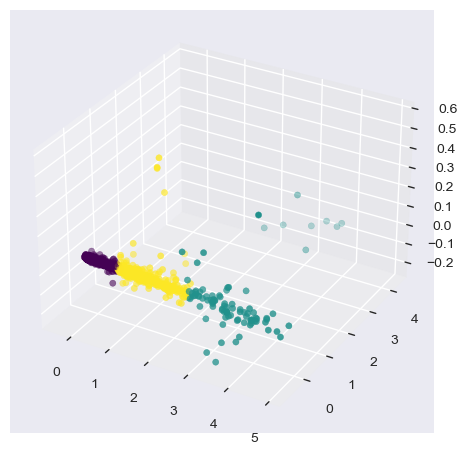

0.68342656


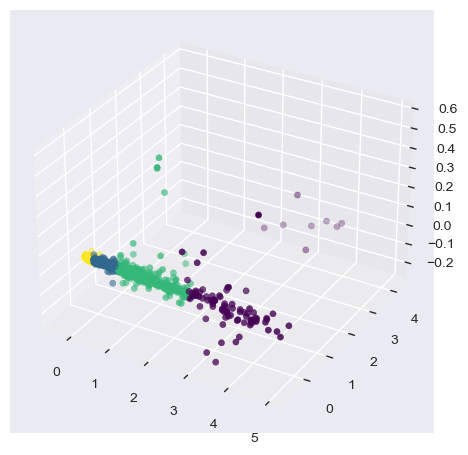

0.68461937


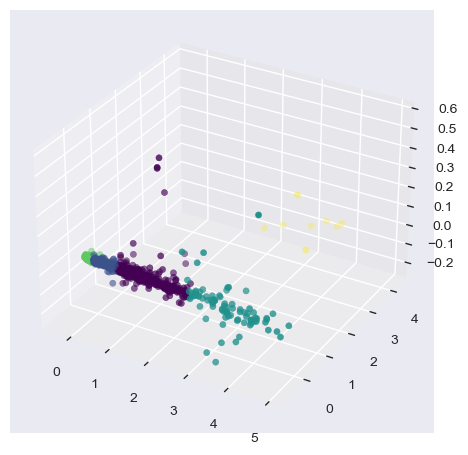

0.6843013


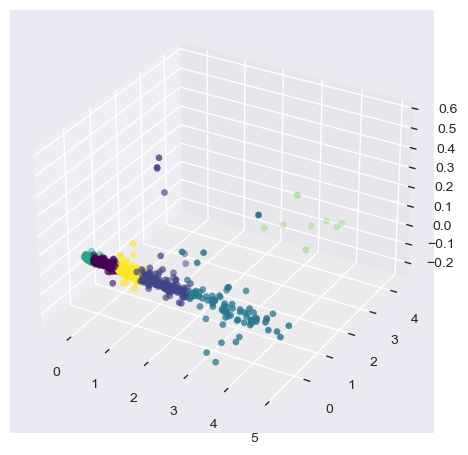

0.64969504


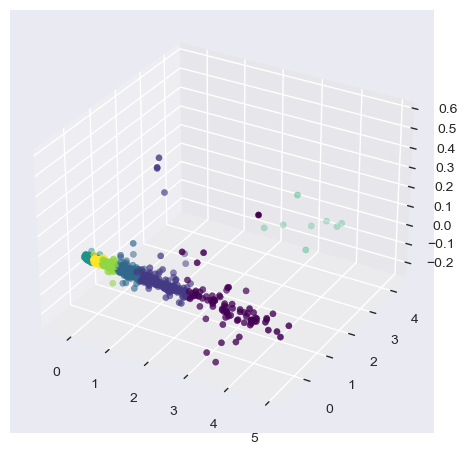

0.64734745


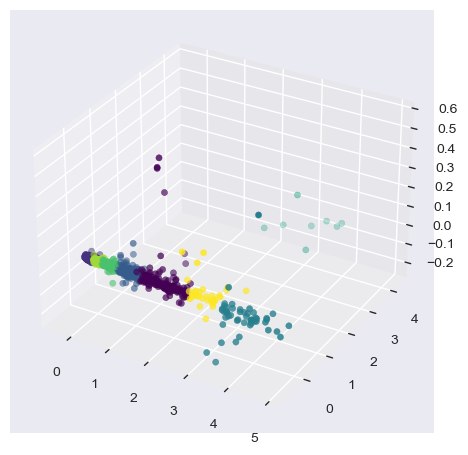

In [209]:
for n in range(2, 9):
    ax = plt.axes(projection='3d')
    ax.scatter3D(X_processed3d[:, 0], X_processed3d[:, 1], X_processed3d[:, 2], c=test_n_for_clustering(n, X_processed3d), cmap='viridis')
    plt.show()